In [2]:
# !pip install deeplift

In [ ]:
# !pip install matplotlib

In [2]:
import numpy as np
import h5py
import joblib
import glob
import pandas as pd
import os
from deeplift.visualization import viz_sequence



In [3]:
file_paths = ['Zhihao_Code/contribution_scores/mesoderm/diff_1.3/BestModel_contr_scores_mesoderm.h5',
              'Zhihao_Code/contribution_scores/cardiac/diff_1.3/BestModel_contr_scores_cardiac.h5',
              'Zhihao_Code/contribution_scores/visceral/diff_1.3/BestModel_contr_scores_visceral.h5',
              'Zhihao_Code/contribution_scores/somatic/diff_1.3/BestModel_contr_scores_somatic.h5',
              'Zhihao_Code/contribution_scores/mesoderm/diff/BestModel_contr_scores_mesoderm.h5',
              'Zhihao_Code/contribution_scores/cardiac/diff/BestModel_contr_scores_cardiac.h5',
              'Zhihao_Code/contribution_scores/visceral/diff/BestModel_contr_scores_visceral.h5',
              'Zhihao_Code/contribution_scores/somatic/diff/BestModel_contr_scores_somatic.h5',
              'Zhihao_Code/contribution_scores/mesoderm/global/BestModel_contr_scores_mesoderm.h5',
              'Zhihao_Code/contribution_scores/cardiac/global/BestModel_contr_scores_cardiac.h5',
              'Zhihao_Code/contribution_scores/visceral/global/BestModel_contr_scores_visceral.h5',
              'Zhihao_Code/contribution_scores/somatic/global/BestModel_contr_scores_somatic.h5']

In [4]:
seq_paths = ['Zhihao_Code/contribution_scores/mesoderm/diff_1.3/cand_test_data_mesoderm',
              'Zhihao_Code/contribution_scores/cardiac/diff_1.3/cand_test_data_cardiac',
              'Zhihao_Code/contribution_scores/visceral/diff_1.3/cand_test_data_visceral',
              'Zhihao_Code/contribution_scores/somatic/diff_1.3/cand_test_data_somatic',
              'Zhihao_Code/contribution_scores/mesoderm/diff/cand_test_data_mesoderm',
              'Zhihao_Code/contribution_scores/cardiac/diff/cand_test_data_cardiac',
              'Zhihao_Code/contribution_scores/visceral/diff/cand_test_data_visceral',
              'Zhihao_Code/contribution_scores/somatic/diff/cand_test_data_somatic',
              'Zhihao_Code/contribution_scores/mesoderm/global/cand_test_data_mesoderm',
              'Zhihao_Code/contribution_scores/cardiac/global/cand_test_data_cardiac',
              'Zhihao_Code/contribution_scores/visceral/global/cand_test_data_visceral',
              'Zhihao_Code/contribution_scores/somatic/global/cand_test_data_somatic']

In [5]:
modisco_paths = ['Zhihao_Code/contribution_scores/mesoderm/diff_1.3/modisco_test_results.h5',
                 'Zhihao_Code/contribution_scores/cardiac/diff_1.3/modisco_test_results.h5',
                 'Zhihao_Code/contribution_scores/visceral/diff_1.3/modisco_test_results.h5',
                 'Zhihao_Code/contribution_scores/somatic/diff_1.3/modisco_test_results.h5',
                 'Zhihao_Code/contribution_scores/mesoderm/diff/modisco_test_results.h5',
                 'Zhihao_Code/contribution_scores/cardiac/diff/modisco_test_results.h5',
                 'Zhihao_Code/contribution_scores/visceral/diff/modisco_test_results.h5',
                 'Zhihao_Code/contribution_scores/somatic/diff/modisco_test_results.h5',  
                 'Zhihao_Code/contribution_scores/mesoderm/global/modisco_test_results.h5',
                 'Zhihao_Code/contribution_scores/cardiac/global/modisco_test_results.h5',
                 'Zhihao_Code/contribution_scores/visceral/global/modisco_test_results.h5',
                 'Zhihao_Code/contribution_scores/somatic/global/modisco_test_results.h5']

# Analyzing seqlets

In [6]:
# Load the sequence
cand_data_global_mesoderm = joblib.load(seq_paths[8])
cand_data_global_cardiac = joblib.load(seq_paths[9])
cand_data_global_visceral = joblib.load(seq_paths[10])
cand_data_global_somatic = joblib.load(seq_paths[11])

cand_data_global_mesoderm.shape, cand_data_global_cardiac.shape, cand_data_global_visceral.shape, cand_data_global_somatic.shape, 

((1330, 15), (1421, 15), (1359, 15), (1404, 15))

In [7]:
cand_data_global_somatic.head()

,seqnames,start,end,name,strand,S2_cardiac_log2,S2_fat_body_log2,S2_hemocytes_log2,S2_mesoderm_log2,S2_neuro_log2,S2_somatic_log2,S2_visceral_log2,Sequence,Class,split_flag
114512,chr2R,25262251,25263251,chr2R_25262251_25263251,+,8.349794,8.491557,8.159659,8.100746,8.163775,8.333893,8.237482,GGGAGCGCCGCGTCTTGTGGCCAGTGCATCGGGATTGGCAGCTTGG...,positive,Test
86661,chr2R,12980401,12981401,chr2R_12980401_12981401,+,8.096425,8.433727,8.048541,8.431627,8.396562,8.137329,8.300572,GACGTAGTTGTGTTGTGCTTCTGTTGTTGCTGCTACGGCATTTGTC...,positive,Test
114552,chr2R,25279501,25280501,chr2R_25279501_25280501,+,7.799003,8.031048,7.608055,6.874133,7.582165,8.119719,7.854675,AAGCTTGGAAATGTCCGGCTTGGGGTTGAAAATCGACCAGAAAGCA...,positive,Test
104418,chr2R,20884151,20885151,chr2R_20884151_20885151,+,7.840098,8.193136,7.706662,7.924700,8.130231,8.048863,8.126369,TGTTACGTTACGTTACGTTACGTTAATCTTTAATCTAGGTCTACAA...,positive,Test
102881,chr2R,20110801,20111801,chr2R_20110801_20111801,+,8.334930,8.126477,8.057921,8.301711,8.265334,8.042529,8.122942,GAAATACACAATTTCTAAAGTTATTTATACAAAATAAGAAGACAAA...,positive,Test


In [8]:
meso_global_mesoderm = h5py.File(file_paths[8], 'r')
meso_contrib_scores_global_mesoderm = meso_global_mesoderm['actual_contrib_scores/Contrib_scores'][:]
meso_hyp_scores_global_mesoderm = meso_global_mesoderm['hyp_contrib_scores/Contrib_scores'][:]
meso_onehot_sequence_global_mesoderm = meso_global_mesoderm['onehot_samples/cand_x'][:]

meso_global_cardiac = h5py.File(file_paths[9], 'r')
meso_contrib_scores_global_cardiac = meso_global_cardiac['actual_contrib_scores/Contrib_scores'][:]
meso_hyp_scores_global_cardiac = meso_global_cardiac['hyp_contrib_scores/Contrib_scores'][:]
meso_onehot_sequence_global_cardiac = meso_global_cardiac['onehot_samples/cand_x'][:]

meso_global_visceral = h5py.File(file_paths[10], 'r')
meso_contrib_scores_global_visceral = meso_global_visceral['actual_contrib_scores/Contrib_scores'][:]
meso_hyp_scores_global_visceral = meso_global_visceral['hyp_contrib_scores/Contrib_scores'][:]
meso_onehot_sequence_global_visceral = meso_global_visceral['onehot_samples/cand_x'][:]

meso_global_somatic = h5py.File(file_paths[11], 'r')
meso_contrib_scores_global_somatic = meso_global_somatic['actual_contrib_scores/Contrib_scores'][:]
meso_hyp_scores_global_somatic = meso_global_somatic['hyp_contrib_scores/Contrib_scores'][:]
meso_onehot_sequence_global_somatic = meso_global_somatic['onehot_samples/cand_x'][:]


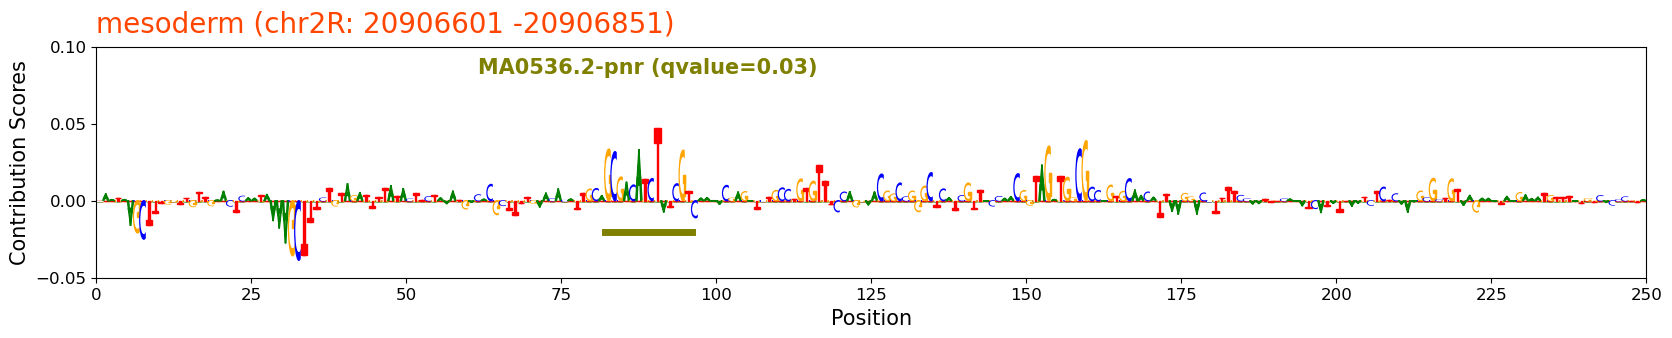

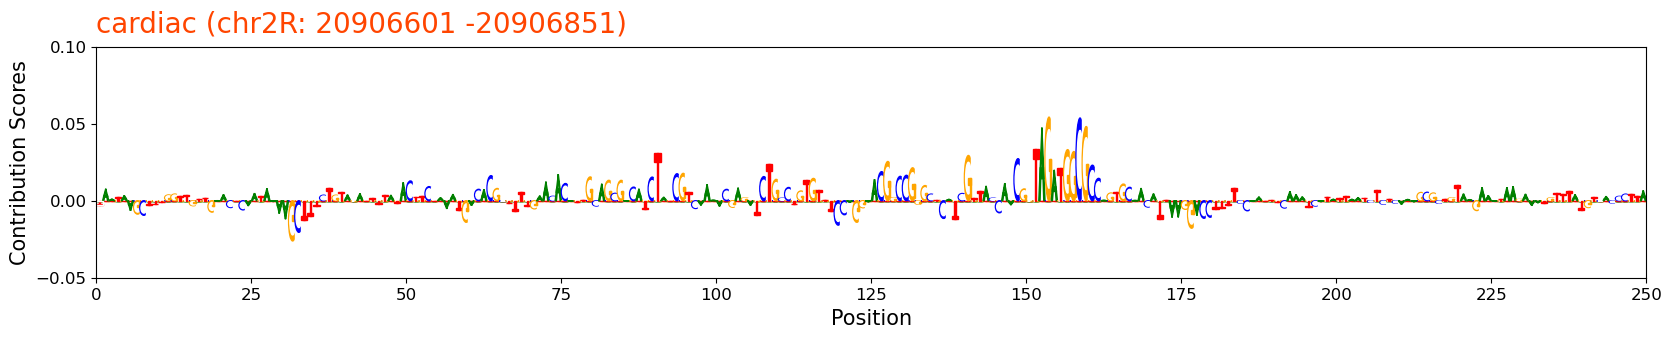

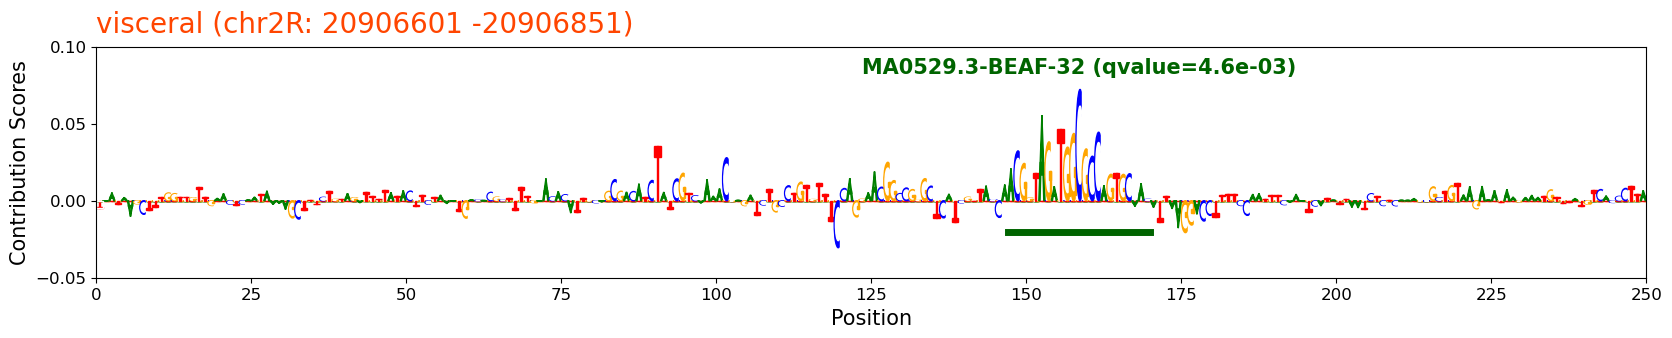

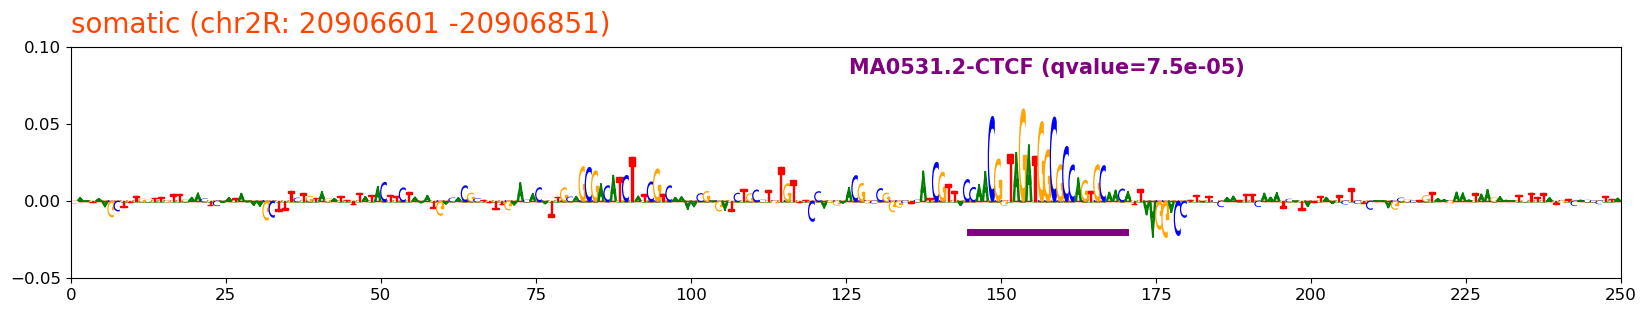

In [15]:
import matplotlib.pyplot as plt


# import numpy as np
# import viz_sequence

# contribution scores data

# Define the regions to annotate (start, end, name, color)
regions_mesoderm = [
    (82, 96, 'MA0536.2-pnr (qvalue=0.03)', 'olive')
]

# Plot the contribution scores
fig, ax = plt.subplots(figsize=(20, 3))

# Highlight regions for the plot_weights function
highlight = {
    'white':[(0,1)]
}

# Use plot_weights_given_ax to add the weights plot to the existing axis

viz_sequence.plot_weights_given_ax(ax=ax, array=meso_contrib_scores_global_mesoderm[296][400:650],
                                   height_padding_factor=0.05,
                                   length_padding=1.0,
                                   subticks_frequency=25,
                                   highlight=highlight)

# Setting y-axis limits
ax.set_ylim(-0.05, 0.1)

# Adding title and y-axis name
plt.text(0, 0.11, 'mesoderm (chr2R: 20906601 -20906851)', fontsize=20, color='orangered', ha='left')

# Adding the annotations for the regions
for start, end, name, color in regions_mesoderm:
    ax.plot([start, end], [-0.02, -0.02], color=color, linewidth=5)
    ax.text((start + end) / 2, 0.08, name, color=color, fontsize=15, ha='center', va='bottom', weight='bold')

# Adding x-axis and y-axis labels
ax.set_xlabel('Position', fontsize=15)
ax.set_ylabel('Contribution Scores', fontsize=15)

# Setting x-axis limits and ticks
ax.set_xlim(0, 250)
ax.set_xticks(np.arange(0, 251, 25))
ax.set_yticks(np.arange(-0.05, 0.1, 0.05))
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.show()


########## cardiac
# Define the regions to annotate (start, end, name, color)
# regions_cardiac = [
#     (174, 200, 'MA0531.2-CTCF', 'purple')
# ]

# Plot the contribution scores
fig, ax = plt.subplots(figsize=(20, 3))

# Highlight regions for the plot_weights function
highlight = {
    'white':[(0,1)]
}

# Use plot_weights_given_ax to add the weights plot to the existing axis

viz_sequence.plot_weights_given_ax(ax=ax, array=meso_contrib_scores_global_cardiac[435][400:650],
                                   height_padding_factor=0.05,
                                   length_padding=1.0,
                                   subticks_frequency=25,
                                   highlight=highlight)

# Setting y-axis limits
ax.set_ylim(-0.05, 0.1)

# Adding title and y-axis name
plt.text(0, 0.11, 'cardiac (chr2R: 20906601 -20906851)', fontsize=20, color='orangered', ha='left')

# # Adding the annotations for the regions
# for start, end, name, color in regions_cardiac:
#     ax.plot([start, end], [-0.02, -0.02], color=color, linewidth=5)
#     ax.text((start + end) / 2, 0.08, name, color=color, fontsize=15, ha='center', va='bottom', weight='bold')

# Adding x-axis and y-axis labels
ax.set_xlabel('Position', fontsize=15)
ax.set_ylabel('Contribution Scores', fontsize=15)

# Setting x-axis limits and ticks
ax.set_xlim(0, 250)
ax.set_xticks(np.arange(0, 251, 25))
ax.set_yticks(np.arange(-0.05, 0.1, 0.05))
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.show()


########## visceral
# Define the regions to annotate (start, end, name, color)
regions_visceral = [
    (147, 170, 'MA0529.3-BEAF-32 (qvalue=4.6e-03)', 'darkgreen')
    # (147, 170, 'MA1456.2-Dref', 'forestgreen'),
    # (147, 170, 'MA0536.2-pnr', 'limegreen'),
]

# Plot the contribution scores
fig, ax = plt.subplots(figsize=(20, 3))

# Highlight regions for the plot_weights function
highlight = {
    'white':[(0,1)]
}

# Use plot_weights_given_ax to add the weights plot to the existing axis
viz_sequence.plot_weights_given_ax(ax=ax, array=meso_contrib_scores_global_visceral[297][400:650],
                                   height_padding_factor=0.05,
                                   length_padding=1.0,
                                   subticks_frequency=25,
                                   highlight=highlight)

# Setting y-axis limits
ax.set_ylim(-0.05, 0.1)

# Adding title and y-axis name
plt.text(0, 0.11, 'visceral (chr2R: 20906601 -20906851)', fontsize=20, color='orangered', ha='left')

# Adding the annotations for the regions, stacking them vertically
y_position = 0.08  # Starting y position for the first annotation
y_increment = 0.015  # Increment y position for subsequent annotations

# Adding the annotations for the regions
for start, end, name, color in regions_visceral:
    ax.plot([start, end], [-0.02, -0.02], color=color, linewidth=5)
    ax.text((start + end) / 2, y_position, name, color=color, fontsize=15, ha='center', va='bottom', weight='bold')
    y_position += y_increment

# Adding x-axis and y-axis labels
ax.set_xlabel('Position', fontsize=15)
ax.set_ylabel('Contribution Scores', fontsize=15)

# Setting x-axis limits and ticks
ax.set_xlim(0, 250)
ax.set_xticks(np.arange(0, 251, 25))
ax.set_yticks(np.arange(-0.05, 0.1, 0.05))
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.show()


########## somatic
# Define the regions to annotate (start, end, name, color)
regions_somatic = [
    (145, 170, 'MA0531.2-CTCF (qvalue=7.5e-05)', 'purple')
]

# Plot the contribution scores
fig, ax = plt.subplots(figsize=(20, 3))

# Highlight regions for the plot_weights function
highlight = {
    'white':[(0,1)]
}

# Use plot_weights_given_ax to add the weights plot to the existing axis
viz_sequence.plot_weights_given_ax(ax=ax, array=meso_contrib_scores_global_somatic[284][400:650],
                                   height_padding_factor=0.05,
                                   length_padding=1.0,
                                   subticks_frequency=25,
                                   highlight=highlight)

# Setting y-axis limits
ax.set_ylim(-0.05, 0.1)

# Adding title and y-axis name
plt.text(0, 0.11, 'somatic (chr2R: 20906601 -20906851)', fontsize=20, color='orangered', ha='left')

# Adding the annotations for the regions
for start, end, name, color in regions_somatic:
    ax.plot([start, end], [-0.02, -0.02], color=color, linewidth=5)
    ax.text((start + end) / 2, 0.08, name, color=color, fontsize=15, ha='center', va='bottom', weight='bold')

# Adding x-axis and y-axis labels
ax.set_xlabel('Position', fontsize=15)
ax.set_ylabel('Contribution Scores', fontsize=15)

# Setting x-axis limits and ticks
ax.set_xlim(0, 250)
ax.set_xticks(np.arange(0, 251, 25))
ax.set_yticks(np.arange(-0.05, 0.1, 0.05))
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.show()
